# Current-based LIF network

Non-plastic spiking network with current-based synapses and balanced state demo (in asynchronous irregular regime).

In [1]:
%reset -f
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as smooth
from scipy.ndimage import uniform_filter1d as mv_avg
from scipy import stats

from aux import Generic
from disp import set_font_size, set_color
from ntwk import LIFNtwkI, join_w

cc = np.concatenate

## Basic tests

Single-cell response to step current:

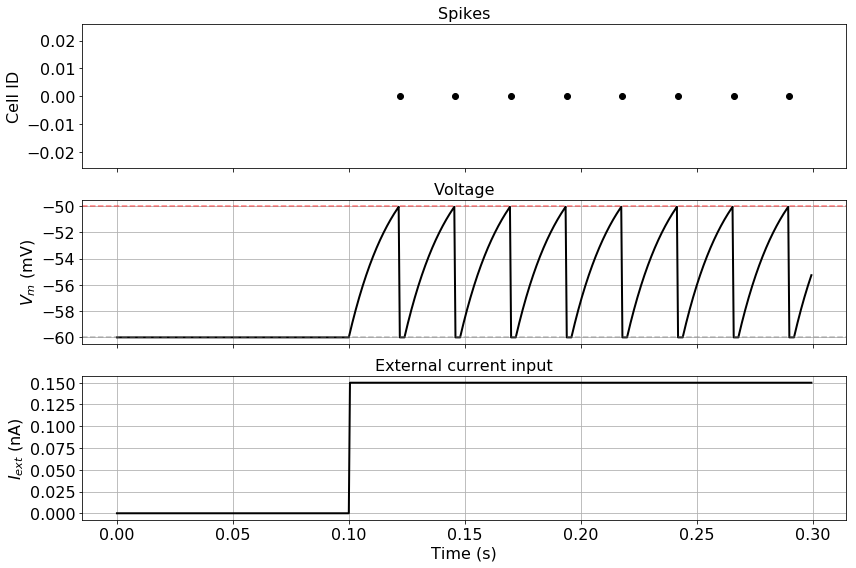

In [2]:
# build 1-cell ntwk
ntwk = LIFNtwkI(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    w_r=np.zeros((1, 1)),
    w_u=None,
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
i_ext[t > 0.1] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

axs[2].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[2].set_title('External current input')
axs[2].set_ylabel('$I_{ext}$ (nA)')
axs[2].set_xlabel('Time (s)')

for ax in axs:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Single-cell EPSPs:

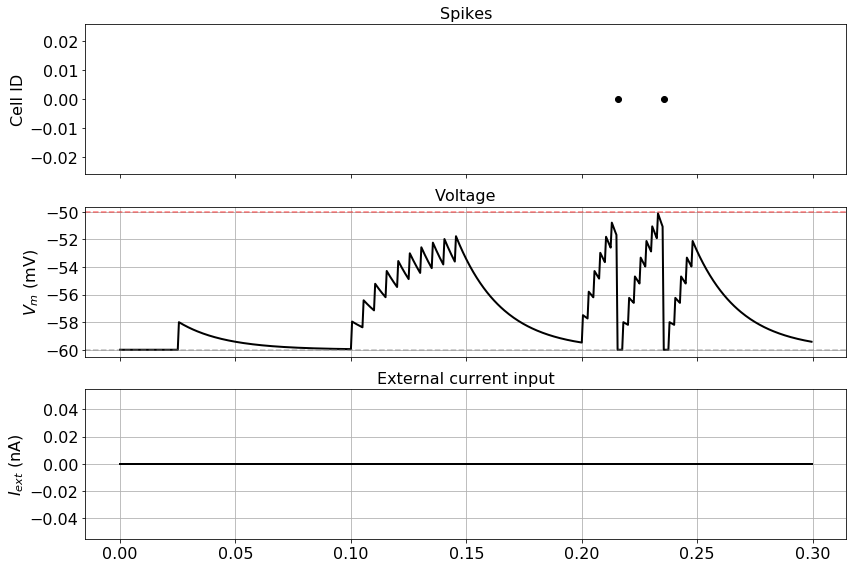

In [3]:
# build 1-cell ntwk
ntwk = LIFNtwkI(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    w_r=np.zeros((1, 1)),
    w_u=.8e-9*np.ones((1, 1)),
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
spks_u = np.zeros((n_t, 1))
spks_u[50, 0] = True
spks_u[np.arange(200, 300, 10), 0] = True
spks_u[np.arange(400, 500, 5), 0] = True

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext, spks_u=spks_u)

# plot results
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

axs[2].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[2].set_title('External current input')
axs[2].set_ylabel('$I_{ext}$ (nA)')

for ax in axs:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Single-cell IPSPs:

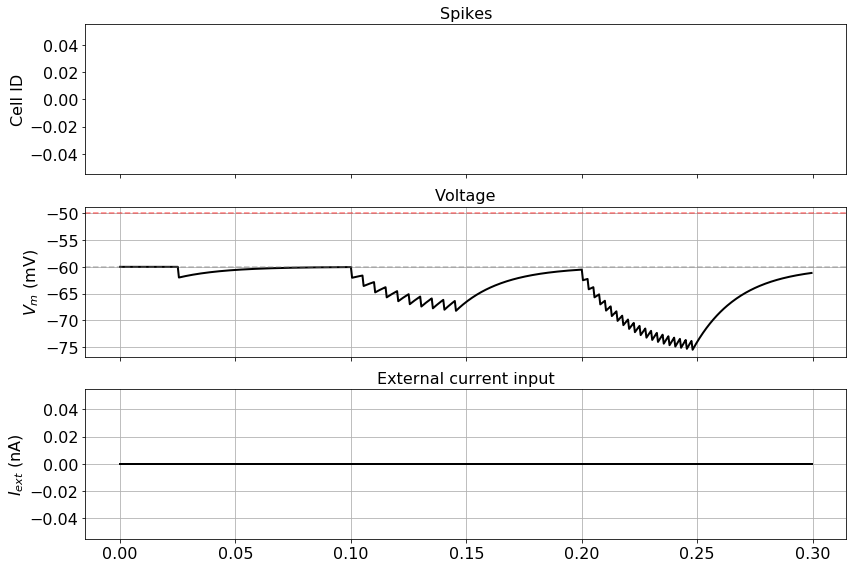

In [4]:
# build 1-cell ntwk
ntwk = LIFNtwkI(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    w_r=np.zeros((1, 1)),
    w_u=-.8e-9*np.ones((1, 1)),
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
spks_u = np.zeros((n_t, 1))
spks_u[50, 0] = True
spks_u[np.arange(200, 300, 10), 0] = True
spks_u[np.arange(400, 500, 5), 0] = True

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext, spks_u=spks_u)

# plot results
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

axs[2].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[2].set_title('External current input')
axs[2].set_ylabel('$I_{ext}$ (nA)')

for ax in axs:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Two-cell demo where I_ext makes cell A spike and cell B receives EPSPs from cell A.

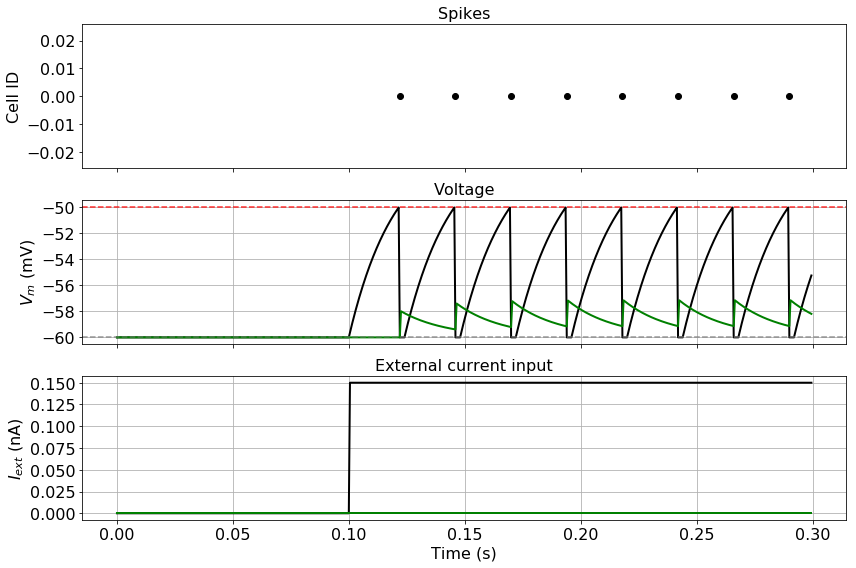

In [5]:
# build 2-cell ntwk
ntwk = LIFNtwkI(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    w_r=.8e-9*np.array([[0, 0], [1, 0]]),
    w_u=None,
    sparse=False)

# run smln
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros((n_t, 2))
i_ext[t > 0.1, 0] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
c = ['k', 'g']
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c=c[i])
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.i_ext[:, i], lw=2, c=c[i])
axs[2].set_title('External current input')
axs[2].set_ylabel('$I_{ext}$ (nA)')
axs[2].set_xlabel('Time (s)')

for ax in axs:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Two-cell demo where I_ext makes cell A spike and cell B receives IPSPs from cell A.

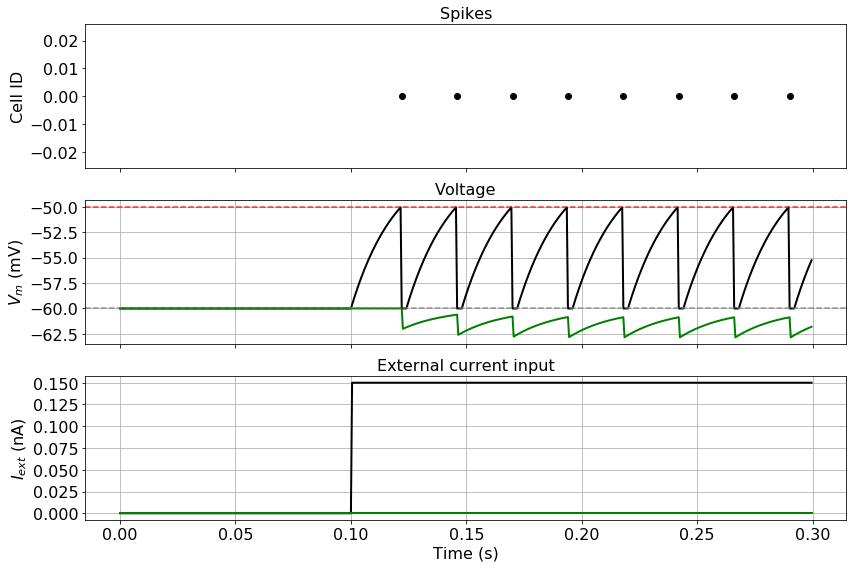

In [6]:
# build 2-cell ntwk
ntwk = LIFNtwkI(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    w_r=-.8e-9*np.array([[0, 0], [1, 0]]),
    w_u=None,
    sparse=False)

# run smln
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros((n_t, 2))
i_ext[t > 0.1, 0] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
c = ['k', 'g']
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c=c[i])
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.i_ext[:, i], lw=2, c=c[i])
axs[2].set_title('External current input')
axs[2].set_ylabel('$I_{ext}$ (nA)')
axs[2].set_xlabel('Time (s)')

for ax in axs:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

# Conductance-based LIF network

Non-plastic spiking network with conductance-based synapses and balanced state demo (with asynchronous irregular spiking).

In [7]:
%reset -f
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as smooth
from scipy.ndimage import uniform_filter1d as mv_avg
from scipy import stats

from aux import Generic
from disp import set_font_size, set_color
from ntwk import LIFNtwkG, join_w

cc = np.concatenate

## Basic tests

Single-cell response to step current:

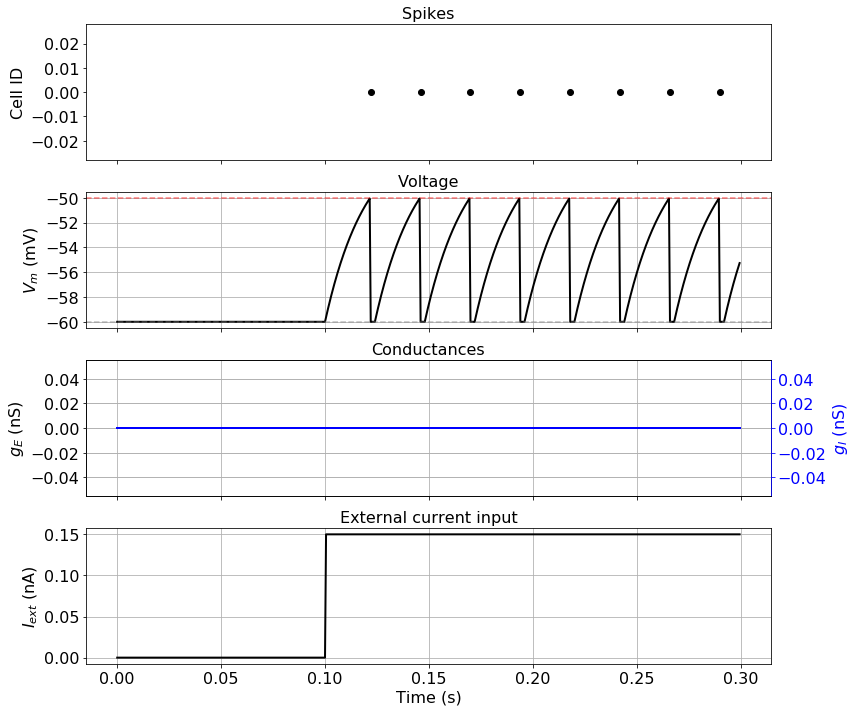

In [8]:
# build 1-cell ntwk
ntwk = LIFNtwkG(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    e_s={'E': 0, 'I': -0.08},  # V
    t_s={'E': 0.002, 'I': 0.002},  # s
    w_r={'E': np.zeros((1, 1)), 'I': np.zeros((1, 1))},
    w_u=None,
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
i_ext[t > 0.1] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

ax_2_twin = axs[2].twinx()
for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.gs['E'][:, 0], lw=2, c='k')
    ax_2_twin.plot(rslt.t, 1e9*rslt.gs['I'][:, 0], lw=2, c='b')
    
axs[2].set_title('Conductances')
axs[2].set_ylabel('$g_E$ (nS)')
ax_2_twin.set_ylabel('$g_I$ (nS)')

set_color(ax_2_twin, 'b')

axs[3].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[3].set_title('External current input')
axs[3].set_ylabel('$I_{ext}$ (nA)')
axs[3].set_xlabel('Time (s)')

for ax in list(axs) + [ax_2_twin]:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Single-cell EPSPs:

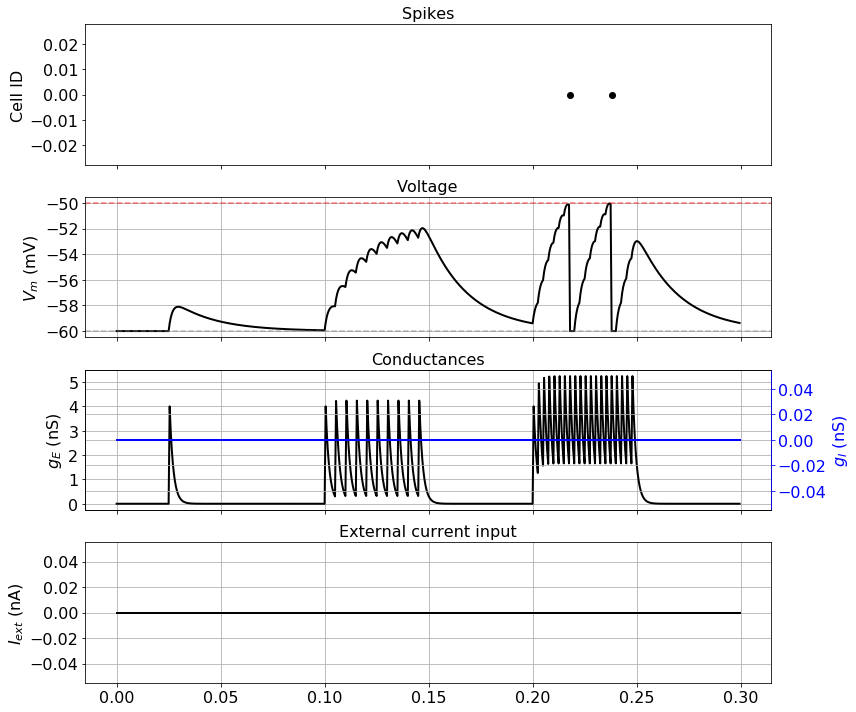

In [9]:
# build 1-cell ntwk
ntwk = LIFNtwkG(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    e_s={'E': 0, 'I': -0.08},  # V
    t_s={'E': 0.002, 'I': 0.002},  # s
    w_r={'E': np.zeros((1, 1)), 'I': np.zeros((1, 1))},
    w_u={'E': 4e-9*np.ones((1, 1))},
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
spks_u = np.zeros((n_t, 1))
spks_u[50, 0] = True
spks_u[np.arange(200, 300, 10), 0] = True
spks_u[np.arange(400, 500, 5), 0] = True

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext, spks_u=spks_u)

# plot results
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

ax_2_twin = axs[2].twinx()
for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.gs['E'][:, 0], lw=2, c='k')
    ax_2_twin.plot(rslt.t, 1e9*rslt.gs['I'][:, 0], lw=2, c='b')
    
axs[2].set_title('Conductances')
axs[2].set_ylabel('$g_E$ (nS)')
ax_2_twin.set_ylabel('$g_I$ (nS)')

set_color(ax_2_twin, 'b')

axs[3].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[3].set_title('External current input')
axs[3].set_ylabel('$I_{ext}$ (nA)')

for ax in list(axs) + [ax_2_twin]:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Single-cell IPSPs:

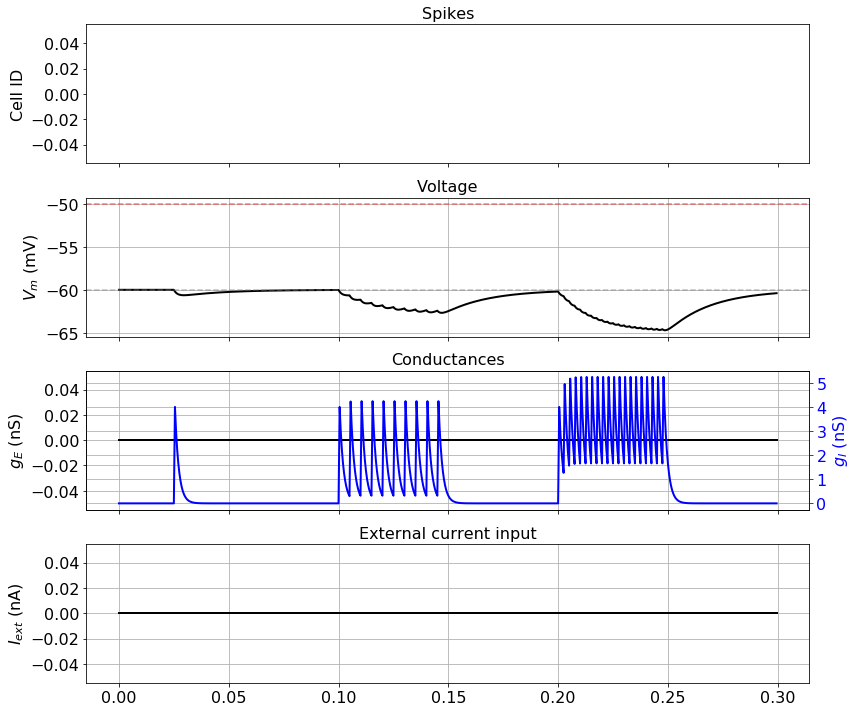

In [10]:
# build 1-cell ntwk
ntwk = LIFNtwkG(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    e_s={'E': 0, 'I': -0.08},  # V
    t_s={'E': 0.002, 'I': 0.002},  # s
    w_r={'E': np.zeros((1, 1)), 'I': np.zeros((1, 1))},
    w_u={'I': 4e-9*np.ones((1, 1))},
    sparse=False)

# run smln for 1-cell ntwk
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros(n_t)
spks_u = np.zeros((n_t, 1))
spks_u[50, 0] = True
spks_u[np.arange(200, 300, 10), 0] = True
spks_u[np.arange(400, 500, 5), 0] = True

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext, spks_u=spks_u)

# plot results
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c='k')
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

ax_2_twin = axs[2].twinx()
for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.gs['E'][:, 0], lw=2, c='k')
    ax_2_twin.plot(rslt.t, 1e9*rslt.gs['I'][:, 0], lw=2, c='b')
    
axs[2].set_title('Conductances')
axs[2].set_ylabel('$g_E$ (nS)')
ax_2_twin.set_ylabel('$g_I$ (nS)')

set_color(ax_2_twin, 'b')

axs[3].plot(rslt.t, 1e9*rslt.i_ext, lw=2, c='k')
axs[3].set_title('External current input')
axs[3].set_ylabel('$I_{ext}$ (nA)')

for ax in list(axs) + [ax_2_twin]:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Two-cell demo where I_ext makes cell A spike and cell B receives EPSPs from cell A.

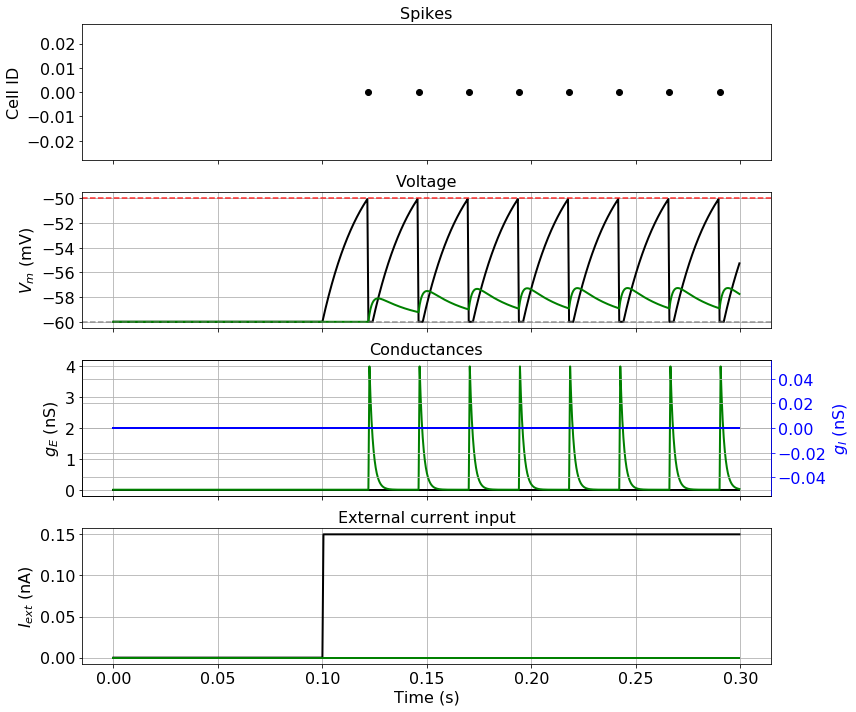

In [11]:
# build 2-cell ntwk
ntwk = LIFNtwkG(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    e_s={'E': 0, 'I': -0.08},  # V
    t_s={'E': 0.002, 'I': 0.002},  # s
    w_r={'E': 4e-9*np.array([[0, 0], [1, 0]]), 'I': np.zeros((2, 2))},
    w_u=None,
    sparse=False)

# run smln
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros((n_t, 2))
i_ext[t > 0.1, 0] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
c = ['k', 'g']
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c=c[i])
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

ax_2_twin = axs[2].twinx()
for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.gs['E'][:, i], lw=2, c=c[i])
    ax_2_twin.plot(rslt.t, 1e9*rslt.gs['I'][:, i], lw=2, c='b')
    
axs[2].set_title('Conductances')
axs[2].set_ylabel('$g_E$ (nS)')
ax_2_twin.set_ylabel('$g_I$ (nS)')

set_color(ax_2_twin, 'b')

for i in range(rslt.ntwk.n):
    axs[3].plot(rslt.t, 1e9*rslt.i_ext[:, i], lw=2, c=c[i])
axs[3].set_title('External current input')
axs[3].set_ylabel('$I_{ext}$ (nA)')
axs[3].set_xlabel('Time (s)')

for ax in list(axs) + [ax_2_twin]:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()

Two-cell demo where I_ext makes cell A spike and cell B receives IPSPs from cell A.

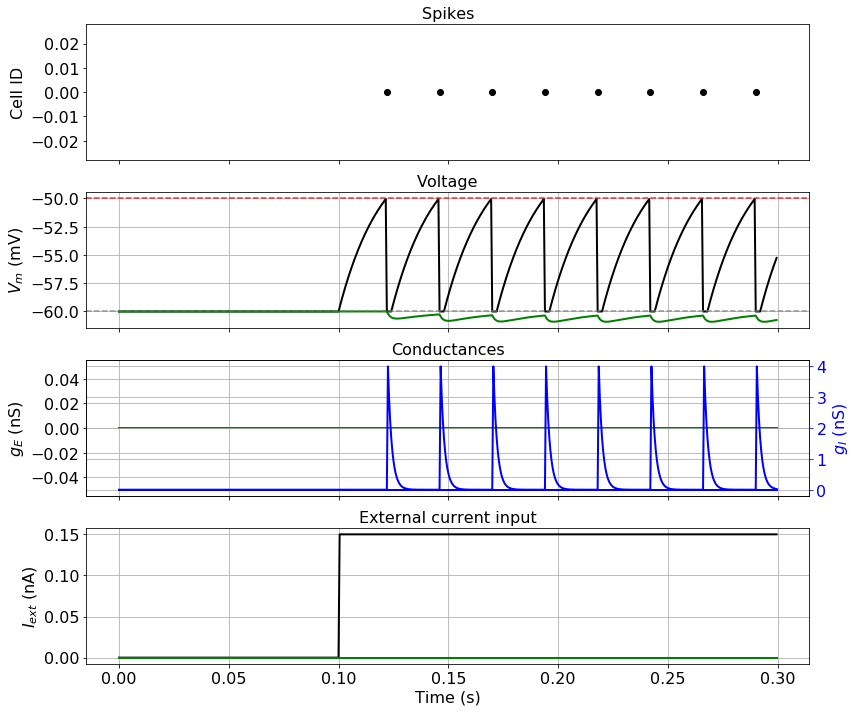

In [12]:
# build 2-cell ntwk
ntwk = LIFNtwkG(
    c_m=.2e-9,  # F
    g_l=10e-9,  # S
    e_l=-0.06,  # V
    v_th=-0.05,  # V
    v_r=-0.06,
    t_r=0.002,  # s
    e_s={'E': 0, 'I': -0.08},  # V
    t_s={'E': 0.002, 'I': 0.002},  # s
    w_r={'E': np.zeros((2, 2)), 'I': 4e-9*np.array([[0, 0], [1, 0]])},
    w_u=None,
    sparse=False)

# run smln
dt = 0.0005
n_t = 600
t = dt * np.arange(n_t, dtype=float)
clamp = Generic(v={0: -0.06}, spk={})
i_ext = np.zeros((n_t, 2))
i_ext[t > 0.1, 0] = .15e-9

rslt = ntwk.run(dt=dt, clamp=clamp, i_ext=i_ext)

# plot results
c = ['k', 'g']
fig, axs = plt.subplots(4, 1, figsize=(12, 10), tight_layout=True, sharex=True)

## spks
axs[0].scatter(rslt.spks_t, rslt.spks_c, c='k')
axs[0].set_title('Spikes')
axs[0].set_ylabel('Cell ID')

for i in range(rslt.ntwk.n):
    axs[1].plot(rslt.t, 1e3*rslt.vs[:, i], lw=2, c=c[i])
    axs[1].axhline(1e3*rslt.ntwk.e_l, color='gray', ls='--', alpha=0.5)
    axs[1].axhline(1e3*rslt.ntwk.v_th, color='r', ls='--', alpha=0.5)

axs[1].set_title('Voltage')
axs[1].set_ylabel('$V_m$ (mV)')

ax_2_twin = axs[2].twinx()
for i in range(rslt.ntwk.n):
    axs[2].plot(rslt.t, 1e9*rslt.gs['E'][:, i], lw=2, c=c[i])
    ax_2_twin.plot(rslt.t, 1e9*rslt.gs['I'][:, i], lw=2, c='b')
    
axs[2].set_title('Conductances')
axs[2].set_ylabel('$g_E$ (nS)')
ax_2_twin.set_ylabel('$g_I$ (nS)')

set_color(ax_2_twin, 'b')

for i in range(rslt.ntwk.n):
    axs[3].plot(rslt.t, 1e9*rslt.i_ext[:, i], lw=2, c=c[i])
axs[3].set_title('External current input')
axs[3].set_ylabel('$I_{ext}$ (nA)')
axs[3].set_xlabel('Time (s)')

for ax in list(axs) + [ax_2_twin]:
    set_font_size(ax, 16)
    if ax is not axs[0]:
        ax.grid()